<a href="https://colab.research.google.com/github/tanphat2008/AI/blob/main/AI_31_2_23_ss2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

In [2]:
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()
x=test_images
y=test_labels

170498071/170498071 [==============================] - 4s 0us/step


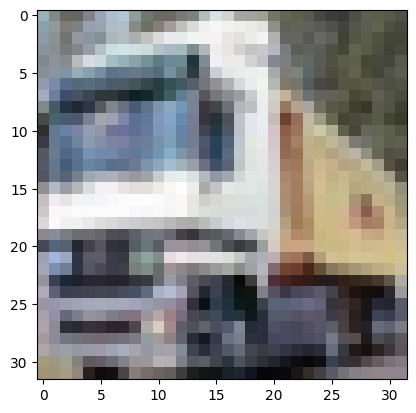

vat nay la: [9]


In [3]:
import matplotlib.pyplot as plt
digit= train_images[1]
plt.imshow(digit,cmap= plt.cm.binary)
plt.show()
print('vat nay la:',train_labels[1])

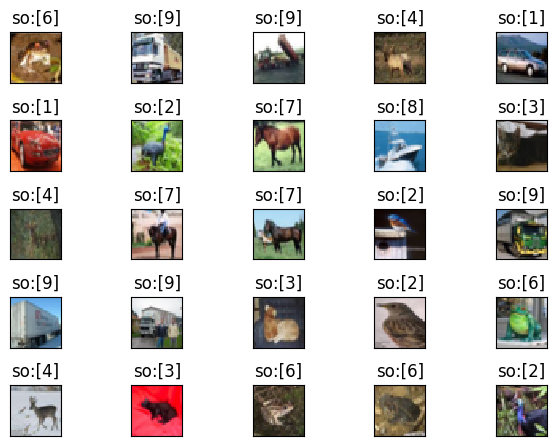

In [4]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('so:{}' .format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
from keras.models import Sequential
from keras.layers import Dense 
model=Sequential()
model.add(Dense(1000,activation='relu',input_shape= (3072,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 3,083,010
Trainable params: 3,083,010
Non-trainable params: 0
_________________________________________________________________


In [6]:
train_images=train_images.reshape(50000,32*32*3)
train_images=train_images.astype('float32')/255
test_images=test_images.reshape(10000,32*32*3)
test_images=test_images.astype('float32')/255

In [7]:
from keras.utils import to_categorical
train_labels= to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)

In [8]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [9]:
model.fit(train_images,train_labels,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('mat mat',test_loss)
print('do chinh xac',test_acc)


Epoch 1/10
391/391 [==============================] - 22s 54ms/step - loss: 2.3075 - accuracy: 0.2628
Epoch 2/10
391/391 [==============================] - 21s 52ms/step - loss: 1.7857 - accuracy: 0.3630
Epoch 3/10
391/391 [==============================] - 21s 54ms/step - loss: 1.6977 - accuracy: 0.3957
Epoch 4/10
391/391 [==============================] - 22s 57ms/step - loss: 1.6440 - accuracy: 0.4170
Epoch 5/10
391/391 [==============================] - 22s 55ms/step - loss: 1.6028 - accuracy: 0.4312
Epoch 6/10
391/391 [==============================] - 22s 56ms/step - loss: 1.5743 - accuracy: 0.4421
Epoch 7/10
391/391 [==============================] - 21s 55ms/step - loss: 1.5497 - accuracy: 0.4512
Epoch 8/10
391/391 [==============================] - 21s 53ms/step - loss: 1.5289 - accuracy: 0.4576
Epoch 9/10
391/391 [==============================] - 22s 57ms/step - loss: 1.5082 - accuracy: 0.4665
Epoch 10/10
313/313 [==============================] - 3s 9ms/step - loss: 1.5690 

In [10]:
#model.save('test1.h5')

In [11]:
#model5=load_model('test1.h5')
#_pred=model5.predict(x)

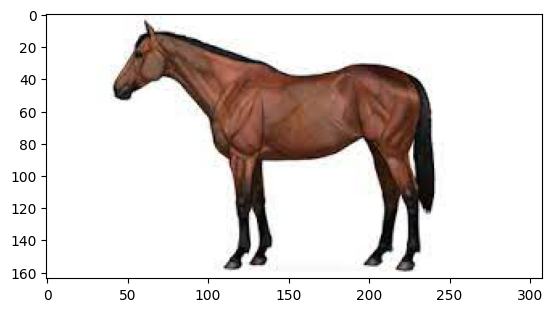

In [21]:
img=plt.imread('horse.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 104ms/step


array([7])

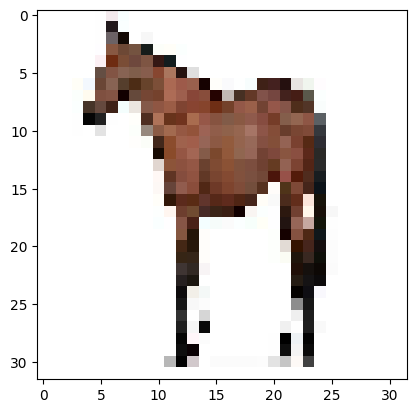

In [27]:
import numpy as np
from keras.utils import load_img,img_to_array
url='horse.jpg'
img=load_img(url,target_size=(32,32))
plt.imshow(img)
img= img_to_array(img)
img= img.reshape(1,32*32*3)
img= img.astype('float32')
img= img/255
np.argmax(model.predict(img),axis=1)